In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import our input dataset
file_path = Path('./Resources/all_columns_df.csv')
all_columns_df = pd.read_csv(file_path)
all_columns_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09


In [3]:
all_columns_df.columns.tolist()

['Rank',
 'Name',
 'Genre',
 'ESRB_Rating',
 'Platform',
 'Publisher',
 'Developer_x',
 'Critic_Score',
 'User_Score',
 'Year',
 'Country',
 'Total_Sales']

In [4]:
all_columns_df.dtypes

Rank              int64
Name             object
Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer_x      object
Critic_Score    float64
User_Score      float64
Year            float64
Country          object
Total_Sales     float64
dtype: object

In [5]:
all_columns_df.count()

Rank            19862
Name            19862
Genre           19862
ESRB_Rating     13925
Platform        19862
Publisher       19862
Developer_x     19860
Critic_Score     4706
User_Score        238
Year            19859
Country         11877
Total_Sales     19862
dtype: int64

In [6]:
# Select Genre & Total_Sales
genre_vs_sales = all_columns_df[['Genre', 'Total_Sales']]
genre_vs_sales.head(5)

,Genre,Total_Sales
0,Sports,82.86
1,Platform,40.24
2,Racing,37.14
3,Shooter,36.60
4,Sports,33.09


In [7]:
genre_vs_sales.count()

Genre          19862
Total_Sales    19862
dtype: int64

In [8]:
# Find null value
for column in genre_vs_sales.columns:
    print(f'Column {column} has {genre_vs_sales[column].isnull().sum()} null values')

Column Genre has 0 null values
Column Total_Sales has 0 null values


In [9]:
genre_vs_sales.head()

,Genre,Total_Sales
0,Sports,82.86
1,Platform,40.24
2,Racing,37.14
3,Shooter,36.60
4,Sports,33.09


In [10]:
genre_vs_sales.shape

(19862, 2)

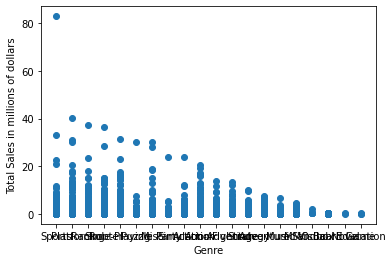

In [11]:
# Visually inspect the relationship between Total Sales & Genre
plt.scatter(genre_vs_sales.Genre, genre_vs_sales.Total_Sales)
plt.ylabel('Total Sales in millions of dollars')
plt.xlabel('Genre')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [22]:
X = genre_vs_sales.Genre.values.reshape(-1, 1)

In [23]:
X[:5]

array([['Sports'],
       ['Platform'],
       ['Racing'],
       ['Shooter'],
       ['Sports']], dtype=object)

In [24]:
X.shape

(19862, 1)

In [25]:
y = genre_vs_sales.Total_Sales
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.ylabel('Total Sales in millions of dollars')
plt.xlabel('Genre')
plt.show()

ValueError: could not convert string to float: 'Sports'

In [ ]:
# Examine the specific parameters of our model: the slope and the y-intercept.
# The slope is represented by model.coef_, and model.intercept_ is the y-intercept
print(model.coef_)
print(model.intercept_)

In [ ]:
# The best fit line is in red, drawn through the predictions.
genre_vs_sales['Genre'].max()